### Benchmark and Repositories

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [3]:
output_dir = "./figures"

In [4]:
import os

In [5]:
def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

#### Simple Example of Graphs

##### We start with some simple graph

In [6]:
complete = nx.complete_graph(n=7)
lollipop = nx.lollipop_graph(m=7, n=3)
barbell = nx.barbell_graph(m1=7, m2=4)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\삼성\\GraphML\\Chapter01\\figures\\SimpleGraphs.png'

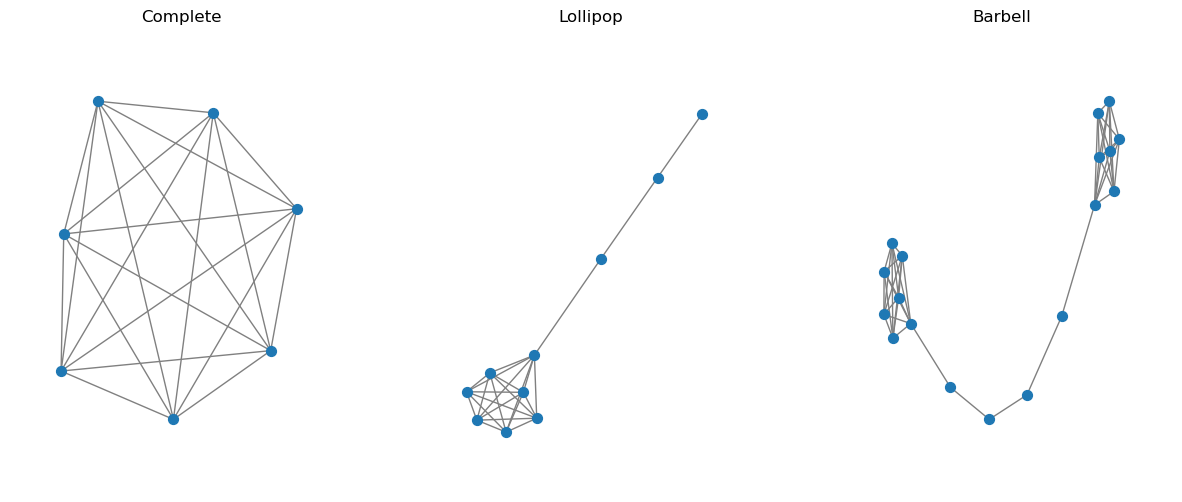

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete)
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop)
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell)
plt.savefig(os.path.join(output_dir, "SimpleGraphs.png"))

In [8]:
complete = nx.relabel_nodes(nx.complete_graph(n=7), lambda x: x + 0)
lollipop = nx.relabel_nodes(nx.lollipop_graph(m=7, n=3), lambda x: x+100)
barbell = nx.relabel_nodes(nx.barbell_graph(m1=7, m2=4), lambda x: x+200)

In [9]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

In [10]:
import numpy as np

#### We compose simple graphs into one

In [11]:
allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))

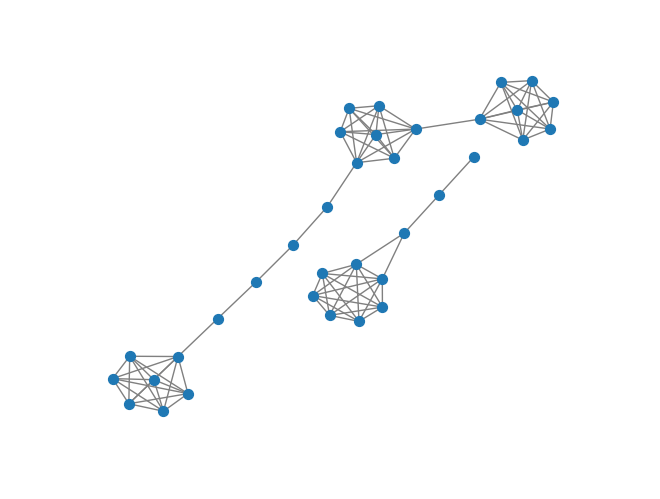

In [12]:
draw_graph(allGraphs, layout=nx.kamada_kawai_layout)

#### Model Barabasi Albert

##### In the following we create and analyse some simple graph generated by the Barabasi-Albert model

In [13]:
BA_graph_small = nx.extended_barabasi_albert_graph(n=20, m=1, p=0, q=0)

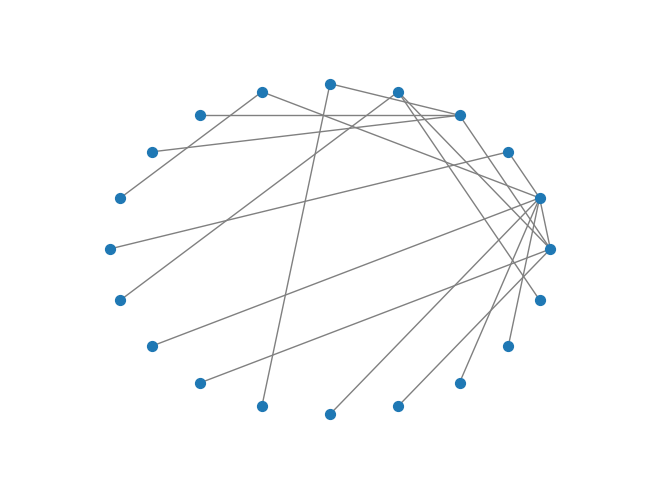

In [14]:
draw_graph(BA_graph_small, layout=nx.circular_layout)

In [15]:
n = 1E5
bag = nx.extended_barabasi_albert_graph(n, m=1, p=0, q=0)

In [16]:
degree = dict(nx.degree(bag)).values()

In [17]:
bins = np.round(np.logspace(np.log10(min(degree)), np.log10(max(degree)), 10))

In [18]:
from collections import Counter
cnt = Counter(np.digitize(np.array(list(degree)), bins))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\삼성\\GraphML\\Chapter01\\figures\\Barabasi_Albert.png'

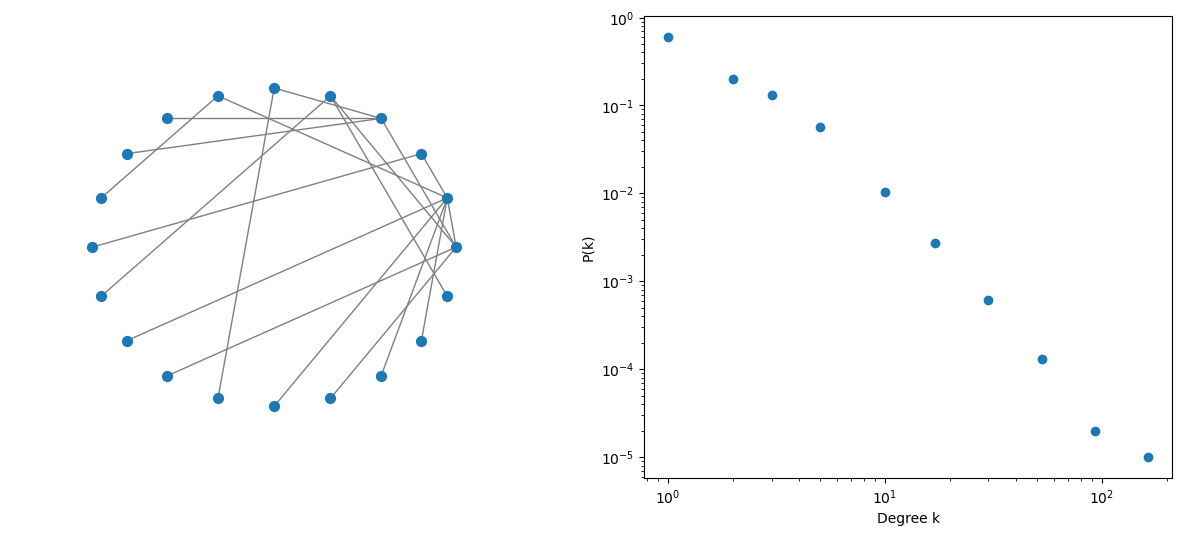

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
draw_graph(BA_graph_small, layout=nx.circular_layout)
plt.subplot(1,2,2)
x, y = list(zip(*[(bins[k-1], v/n) for k, v in cnt.items()]))
plt.plot(x, y, 'o'); plt.xscale("log"); plt.yscale("log")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.savefig(os.path.join(output_dir, "Barabasi_Albert.png"))

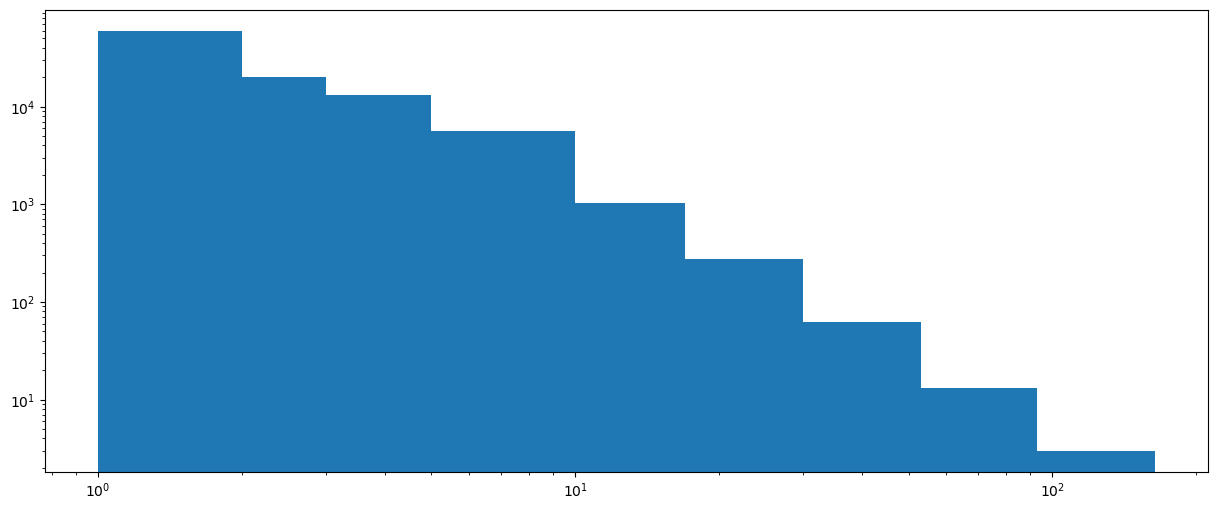

In [20]:
plt.figure(figsize=(15, 6))

plt.hist(degree, bins=bins)
plt.xscale("log")
plt.yscale("log")

##### Other simple graph Benchmarks

In [21]:
import pandas as pd

In [22]:
graph = nx.florentine_families_graph()

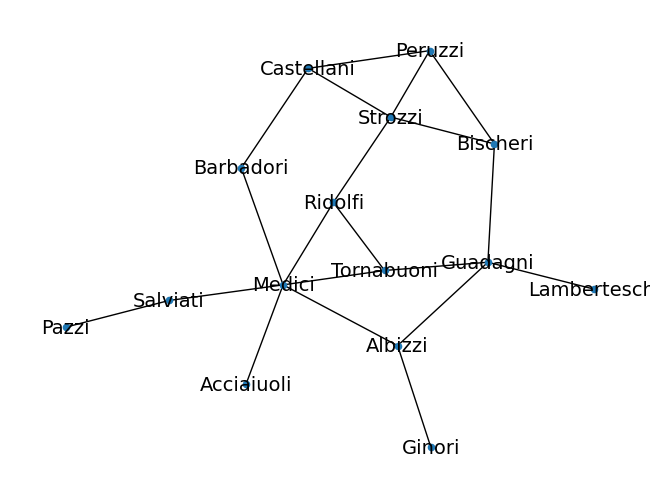

In [23]:
nx.draw_kamada_kawai(graph, with_labels=True, node_size=20, font_size=14)
plt.savefig("Florentine.png")